In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
train_sig_path_ex1 = "https://www.nbi.dk/~koskinen/Teaching/data/BDT_signal_train.txt"
train_bg_path_ex1 = "https://www.nbi.dk/~koskinen/Teaching/data/BDT_background_train.txt"
test_sig_path_ex1 = "https://www.nbi.dk/~koskinen/Teaching/data/BDT_signal_test.txt"
test_bg_path_ex1 = "https://www.nbi.dk/~koskinen/Teaching/data/BDT_background_test.txt"

train_sig_data_ex1 = pd.read_csv(train_sig_path_ex1, delimiter="\s", engine="python", names=["x", "y", "z"])
train_bg_data_ex1 = pd.read_csv(train_bg_path_ex1, delimiter="\s", engine="python", names=["x", "y", "z"])
test_sig_data_ex1 = pd.read_csv(test_sig_path_ex1, delimiter="\s", engine="python", names=["x", "y", "z"])
test_bg_data_ex1 = pd.read_csv(train_bg_path_ex1, delimiter="\s", engine="python", names=["x", "y", "z"])

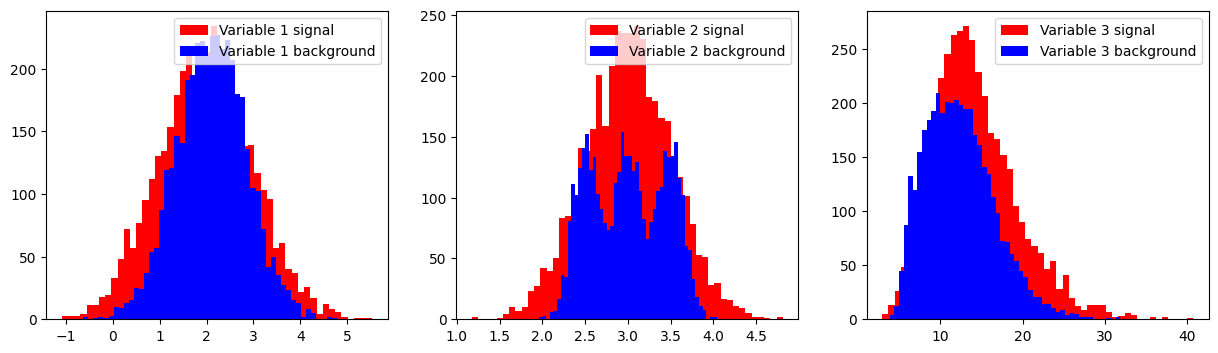

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(train_sig_data_ex1["x"], bins=50, label="Variable 1 signal", color="red")
axs[0].hist(train_bg_data_ex1["x"], bins=50, label="Variable 1 background", color="blue")
axs[0].legend()

axs[1].hist(train_sig_data_ex1["y"], bins=50, label="Variable 2 signal", color="red")
axs[1].hist(train_bg_data_ex1["y"], bins=50, label="Variable 2 background", color="blue")
axs[1].legend()

axs[2].hist(train_sig_data_ex1["z"], bins=50, label="Variable 3 signal", color="red")
axs[2].hist(train_bg_data_ex1["z"], bins=50, label="Variable 3 background", color="blue")
axs[2].legend()
plt.show()

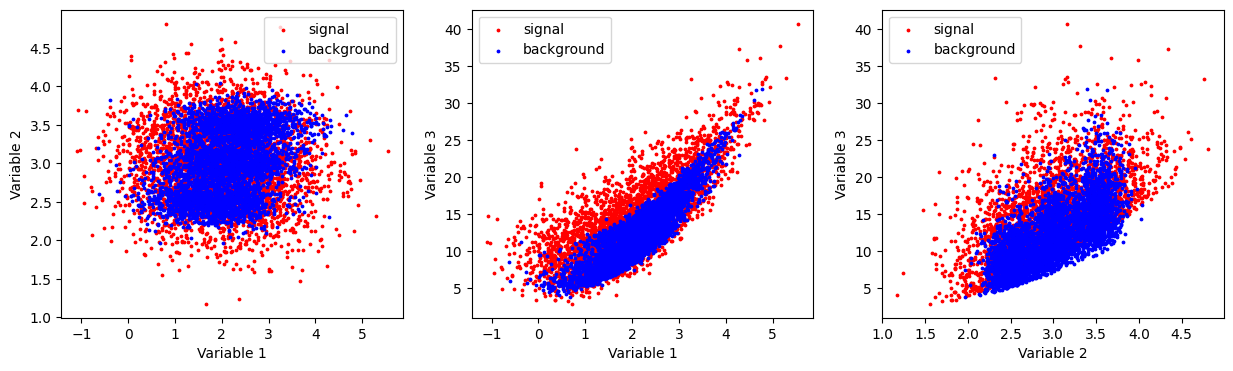

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].scatter(train_sig_data_ex1["x"], train_sig_data_ex1["y"], color="red", label="signal", s=3)
axs[0].scatter(train_bg_data_ex1["x"], train_bg_data_ex1["y"], color="blue", label="background", s=3)
axs[0].set_xlabel("Variable 1")
axs[0].set_ylabel("Variable 2")
axs[0].legend()

axs[1].scatter(train_sig_data_ex1["x"], train_sig_data_ex1["z"], color="red", label="signal", s=3)
axs[1].scatter(train_bg_data_ex1["x"], train_bg_data_ex1["z"], color="blue", label="background", s=3)
axs[1].set_xlabel("Variable 1")
axs[1].set_ylabel("Variable 3")
axs[1].legend()

axs[2].scatter(train_sig_data_ex1["y"], train_sig_data_ex1["z"], color="red", label="signal", s=3)
axs[2].scatter(train_bg_data_ex1["y"], train_bg_data_ex1["z"], color="blue", label="background", s=3)
axs[2].set_xlabel("Variable 2")
axs[2].set_ylabel("Variable 3")
axs[2].legend()
plt.show()

In [5]:
sig_bg_train_ex1 = pd.concat((train_bg_data_ex1, train_sig_data_ex1)).reset_index(drop=True)
sig_bg_train_ex1["class"] = 0
sig_bg_train_ex1.loc[len(train_bg_data_ex1):, "class"] = 1

sig_bg_test_ex1 = pd.concat((test_bg_data_ex1, test_sig_data_ex1)).reset_index(drop=True)
sig_bg_test_ex1["class"] = 0
sig_bg_test_ex1.loc[len(test_bg_data_ex1):, "class"] = 1


bst = XGBClassifier(n_estimators=5, max_depth=10, learning_rate=1, objective="binary:logistic")
bst.fit(sig_bg_train_ex1[["x", "y", "z"]], sig_bg_train_ex1["class"])
prob_ex1 = bst.predict_proba(sig_bg_test_ex1[["x", "y", "z"]])[:, 1]
prob_ex1_bg = prob_ex1[:len(test_bg_data_ex1)-1]
prob_ex1_sig = prob_ex1[len(test_bg_data_ex1):]
roc_auc_ex1 = roc_auc_score(sig_bg_test_ex1["class"],prob_ex1)

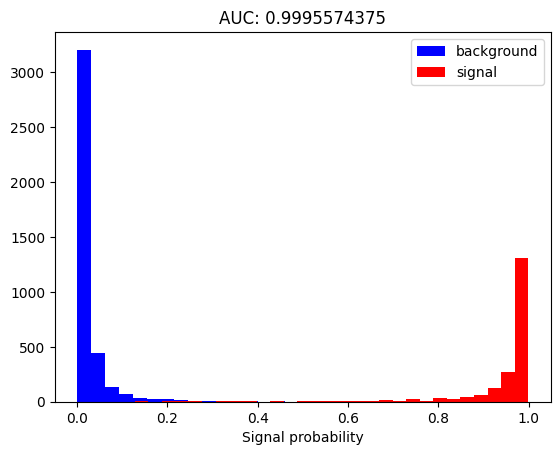

In [6]:
plt.hist(prob_ex1_bg, bins=30, label="background", color="blue")
plt.hist(prob_ex1_sig, bins=30, label="signal", color="red")
plt.xlabel("Signal probability")
plt.title(f"AUC: {roc_auc_ex1}")
plt.legend()
plt.show()

In [7]:
data_path_ex2 = "https://www.nbi.dk/~koskinen/Teaching/data/BDT_16var.txt"
df_ex2 = pd.read_csv(
    data_path_ex2,
    delimiter="\s+",
    names=[
        "var1",
        "var2",
        "var3",
        "var4",
        "var5",
        "var6",
        "var7",
        "var8",
        "var9",
        "var10",
        "var11",
        "var12",
        "var13",
        "var14",
        "var15",
        "var16",
    ],
    index_col=0,
    engine="python",
)
ex2_sig = df_ex2.iloc[::2]
ex2_bg = df_ex2.iloc[1::2]
ex2_bg_sig = pd.concat((ex2_bg, ex2_sig)).reset_index(drop=True)
ex2_y = np.append(np.zeros(len(ex2_bg)), np.ones(len(ex2_sig)))

In [11]:
X_train_ex2, X_test_ex2, y_train_ex2, y_test_ex2 = train_test_split(
    ex2_bg_sig, ex2_y, test_size=0.4
)
xgb_ex2 = XGBClassifier(objective="binary:logistic")
param_grid_ex2 = {
    "learning_rate": [0.05],
    "min_child_weight": [1, 5, 10],
    "n_estimators": [200],
    "max_depth": [3, 6, 9],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
}
grid_ex2 = GridSearchCV(
    estimator=xgb_ex2,
    param_grid=param_grid_ex2,
    scoring="roc_auc",
    cv=5,
    verbose=3
)
grid_ex2.fit(X_train_ex2, y_train_ex2)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.956 total time=   1.9s
[CV 2/5] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.953 total time=   1.0s
[CV 3/5] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.946 total time=   1.7s
[CV 4/5] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.954 total time=   1.9s
[CV 5/5] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.949 total time=   0.9s
[CV 1/5] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.957 total time=   1.5s
[CV 2/5] END colsamp

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.05], 'max_depth': [3, 6, 9],
                         'min_child_weight': [1, 5, 10], 'n_estimators': [200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='roc_auc', verbose=3)

In [14]:
grid_ex2.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 0.6}

In [16]:
grid_ex2.best_score_

0.9546027184688018

In [66]:
opt_param_dict = {
'colsample_bytree': 1.0,
'learning_rate': 0.04,
'max_depth': 3,
'min_child_weight': 1,
'n_estimators': 700,
'subsample': 0.6
}

xgb_opt_ex2 = XGBClassifier(
    objective="binary:logistic",
    **opt_param_dict
)
xgb_opt_ex2.fit(X_train_ex2, y_train_ex2)
xgb_opt_ex2_probs = xgb_opt_ex2.predict_proba(X_test_ex2)[:, 1]
roc_auc_xgb_opt_ex2 = roc_auc_score(y_test_ex2, xgb_opt_ex2_probs)
print(f"ROC AUC for best parameters I could find: {roc_auc_xgb_opt_ex2:.3f}")

ROC AUC for best parameters I could find: 0.952


<Axes: >

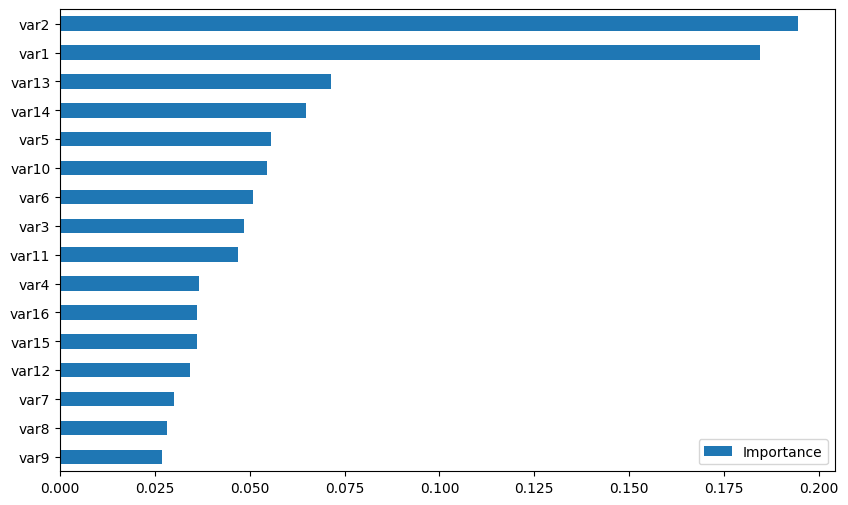

In [78]:
feature_importances_ex2 = pd.DataFrame(
    data=xgb_opt_ex2.feature_importances_,
    index=df_ex2.columns,
    columns=["Importance"],
).sort_values("Importance", ascending=True)
feature_importances_ex2.plot(kind="barh", figsize=(10, 6))